# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.datasets import make_blobs

# Loading the training dataset

For demonstration purposes, let us take a 2 dimensional dataset with two features (Feature_1 and Feature_2) and consisting of four clusters (Cluster A, Cluster B, Cluster C and Cluster D).

In [24]:
X,Y=make_blobs(n_samples=800,centers=4,random_state=42)

# Visualising the dataset

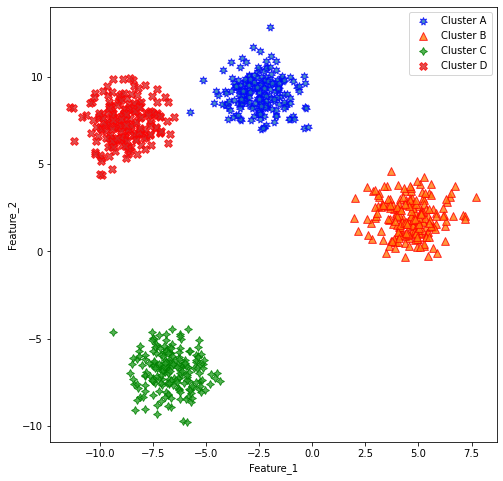

In [25]:
plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(X[Y==0][:,0],X[Y==0][:,1], label="Cluster A", marker=(7,1,0), edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], label="Cluster B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
plt.scatter(X[Y==2][:,0],X[Y==2][:,1], label="Cluster C", marker=(4,1,0), edgecolor = "g", s = 60, alpha = 0.8)
plt.scatter(X[Y==3][:,0],X[Y==3][:,1], label="Cluster D", marker="X", edgecolor = "red", s =60, alpha = 0.8)
plt.legend()
plt.show()

# Machine Learning Model

## Defining the model

In [30]:
class KMeans:
    def __init__(self,X,Y,k):
        self.X=X
        self.Y=Y
        self.k=k
        self.loss = None
        self.clusters={}
        self.loss_list = []
        self.clusters_list = []
        for i in range(self.k):
            np.random.seed(42)
            center=10*(2*np.random.random((self.X.shape[1],))-1)
            points=[]
            self.clusters[i]={'center':center,'points':points}
            
    def distance(self,x1,x2):
        return(np.sqrt(np.sum((x1-x2)**2)))
    
    def Appending_Points(self):
        for point in self.X:
            dist=[]
            for i in range(self.k):
                dist.append(self.distance(point,self.clusters[i]['center']))
            self.clusters[np.argmin(dist)]['points'].append(point)
            self.loss += np.min(dist)
        return(self.clusters)
        
    def updating_clusters(self):
        for i in range(self.k):
            pts=np.array(self.clusters[i]['points'])
            if pts.shape[0]>0:
                self.clusters[i]['center']=pts.mean(axis=0)
                self.clusters[i]['points']=[]
        return(self.clusters)
        
    def n_centers(self):
        for _ in range(30):
            self.loss = 0
            self.clusters=self.Appending_Points()
            self.clusters=self.updating_clusters()
            self.clusters_list.append([self.clusters[i]["center"]for i in self.clusters.keys()])
            self.loss_list.append(self.loss)
            if len(self.loss_list) > 2 and self.loss == self.loss_list[-2]:
                break
        return(self.clusters_list, self.loss_list)

## Training the model

### The loss here represents the sum of distances of all points from its closest cluster centre

In [31]:
Kmeans=KMeans(X,Y,4)
clusters_list, loss_list = Kmeans.n_centers()

## Visualising the loss

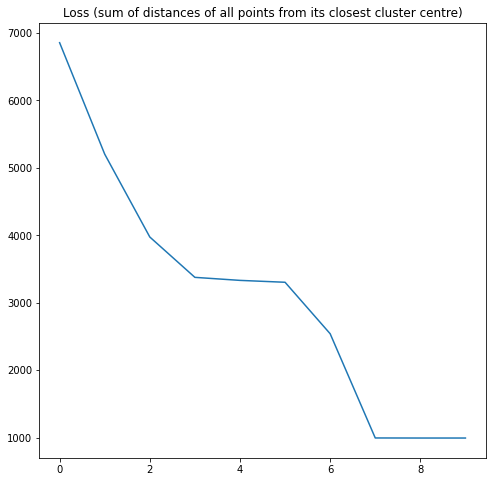

In [32]:
plt.figure(figsize=(8,8))
plt.plot(loss_list)
plt.title("Loss (sum of distances of all points from its closest cluster centre)")
plt.show()

## Visualising the cluster centres over iterations

## Plotting the final cluster centers

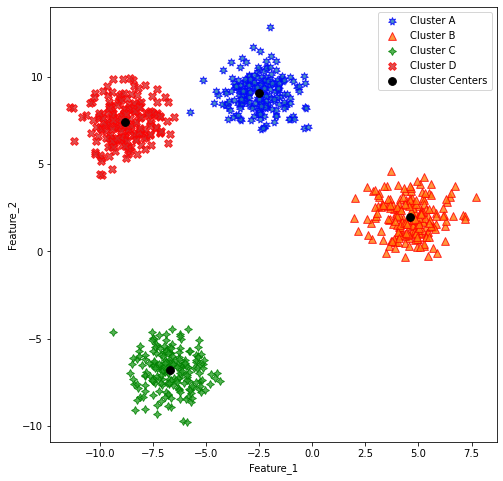

In [33]:
plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(X[Y==0][:,0],X[Y==0][:,1], label="Cluster A", marker=(7,1,0), edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], label="Cluster B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
plt.scatter(X[Y==2][:,0],X[Y==2][:,1], label="Cluster C", marker=(4,1,0), edgecolor = "g", s = 60, alpha = 0.8)
plt.scatter(X[Y==3][:,0],X[Y==3][:,1], label="Cluster D", marker="X", edgecolor = "r", s =60, alpha = 0.8)
plt.scatter([i[0] for i in clusters_list[-1]], [i[1] for i in clusters_list[-1]], label="Cluster Centers", marker="o",c= "black", s =60, alpha = 1)
plt.legend()
plt.show()